<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практическое-применение-Matplotlib-и-Seaborn" data-toc-modified-id="Практическое-применение-Matplotlib-и-Seaborn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практическое применение Matplotlib и Seaborn</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подгатавливаем-всё-для-работы" data-toc-modified-id="Подгатавливаем-всё-для-работы-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Подгатавливаем всё для работы</a></span></li><li><span><a href="#Корректируем-данные" data-toc-modified-id="Корректируем-данные-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Корректируем данные</a></span></li><li><span><a href="#Ищем-корреляции" data-toc-modified-id="Ищем-корреляции-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Ищем корреляции</a></span></li><li><span><a href="#Появление-Seaborn" data-toc-modified-id="Появление-Seaborn-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Появление Seaborn</a></span></li><li><span><a href="#Что-ещё-умеет-Seaborn?" data-toc-modified-id="Что-ещё-умеет-Seaborn?-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Что ещё умеет Seaborn?</a></span></li><li><span><a href="#Работа-с-категориями-данных-в-Seaborn-(несколько-наборов-данных-на-одной-фигуре)" data-toc-modified-id="Работа-с-категориями-данных-в-Seaborn-(несколько-наборов-данных-на-одной-фигуре)-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Работа с категориями данных в Seaborn (несколько наборов данных на одной фигуре)</a></span></li></ul></li><li><span><a href="#Практика-и-домашнее-задание" data-toc-modified-id="Практика-и-домашнее-задание-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Практика и домашнее задание</a></span></li></ul></li></ul></div>

# Практическое применение Matplotlib и Seaborn

### Подгатавливаем всё для работы

In [1]:
# Импортируем matplotlip
import matplotlib.pyplot as plt

# Импортируем seaborn
import seaborn as sns

# NumPy нам тоже снова понадобится
import numpy as np

In [2]:
# Загружаем данные и сразу смотрим на них
import pandas as pd
orig_wines = pd.read_csv('data/red.csv')
orig_wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


### Корректируем данные

Для начала посмотрим как распределены вина по цене, для этого нам пригодится гистограмма.

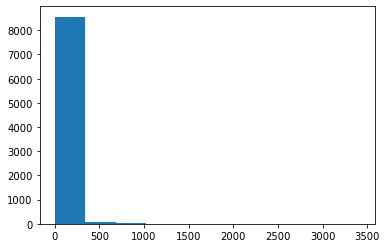

In [10]:
# Распределение цен
x = orig_wines['Price']
plt.hist(x);

Здесь мы можем наглядно увидеть, что цены распределены крайне неравномерно. В таком случае нам не помешает срезать данные, которые явно выбиваются из средних.  
Сейчас нам придется сделать довольно замословатые преобразования при помощи pandas.

In [11]:
# Берём 95 персентиль и заодно уберём вина, за которые голосовало меньше 200 людей
wines = orig_wines[(orig_wines['Price'] < orig_wines['Price'].quantile(.95)) & (orig_wines['NumberOfRatings'] < 200)]

Теперь в наших данных не будет черезчур дорогих вин, которые портят статистику. Посмотрим что осталось.

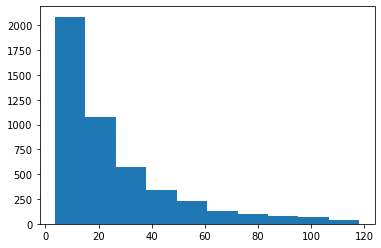

In [12]:
x = wines['Price']
plt.hist(x)
plt.show()

Да, теперь данные выглядят намного лучше.   
Теперь проверим нормальность этого распределения (хотя и так понятно что оно не особо нормальное).  
Подробнее про значения Skewness и Kurtosis смотрите здесь: https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

In [13]:
print("Skewness: %f" % wines['Price'].skew())
print("Kurtosis: %f" % wines['Price'].kurt())

Skewness: 1.753624
Kurtosis: 2.782281


### Ищем корреляции
Визуализация данных лучше всего поможет нам определить есть ли среди наших данных корреляции. Возможно значения в одном стобце напрямую связаны со значениями из другого столбца?

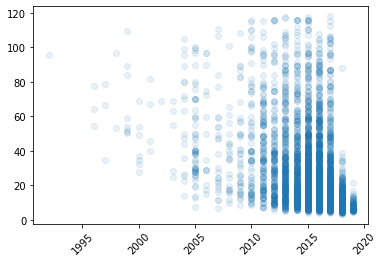

In [14]:
# Посмотрим на зависимость цены от года производства

fig, ax = plt.subplots()

x = wines['Year']
y = wines['Price']
ax.scatter(x, y, alpha=0.1)
plt.xticks(rotation=45)

plt.show()

Видим, что цена вина хоть и зависит от года производста, но не так сильно, как этого можно было ожидать.  
Попробуем поискать в другом месте.

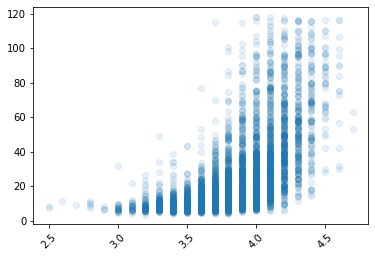

In [15]:
# Посмотрим на зависимость цены от рейтинга

fig, ax = plt.subplots()

x = wines['Rating']
y = wines['Price']
ax.scatter(x, y, alpha=0.1)
plt.xticks(rotation=45)

plt.show()

Здесь результаты явно имеют закономерность и цена растёт вместе с оценкой опрошенных людей. Теперь мы знаем, что людям нравятся вина подороже.

### Появление Seaborn
Seaborn - это надстройка над Matplotlib, которая позволяет строить графики легче и меньше задумываться над подготовкой данных. Кроме того, внутри Seaborn содержится много красивых и довольно сложных графиков для очень разных исследований.  
Мы рассмотрим пару из них.

Попробуем посмотреть на зависимость цены от рейтинга через призму BoxPlot.  
Для того чтобы создать BoxPlot распределения цен по качеству с помощью matplotlib нам пришлось бы подготавливать данные сложным образом. Seaborn уже сделал всё за нас!

(-0.5, 22.5, 0.0, 140.0)

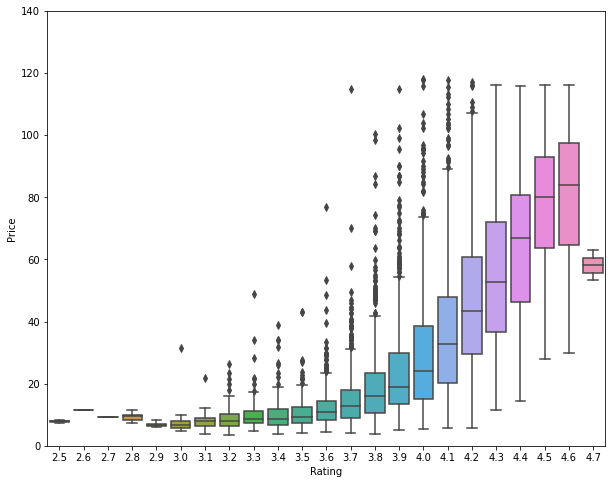

In [16]:
# Смотрим на более наглядное распределение цен по рейтингу
plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='Rating', y="Price", data=wines)
fig.axis(ymin=0, ymax=140)

Теперь закономерность стала ещё очевиднее. Мы можем заметить, что при низкой оценке высокая цена это единичные случаи, которые не попадают в околомедианные значения. На простом графике из точек это было не так заметно.  
Но попробуем закрепить наши догадки с помощью тепловой карты!

In [17]:
cnged_wines = wines.copy(deep=True)
# Здесь мы переворачиваем значение года т.к. зависимость цены от года ожидается обратная.
cnged_wines['Year'] = -wines['Year']

# Строим матрицу корреляции
corr = cnged_wines.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

Сейчас мы видим симметричную карту, половина значений для нас бесполезна. Можно откинуть лишнее.

In [ ]:
# Здесь нам снова пригодился numpy с его методами для работы с матрицами
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

Вот теперь всё окончательно встаёт на свои места. Мы видим, что действительно сильнее всёго связаны рейтинг вина и его цена, а вот год производства почти не повлиял на оценку опрошенных людей.

### Что ещё умеет Seaborn?
Для начала предлагаю посмотреть на парочку простых графиков, которые теперь выглядят намного лучше

In [ ]:
# Уже знакомая нам гистограмма
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(wines['Price'], kde=True);

Зависимость цены от года легко построить с красивым указанием погрешности

<AxesSubplot:xlabel='Year', ylabel='Price'>

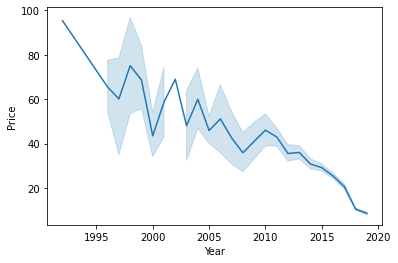

In [18]:
sns.lineplot(x="Year", y="Price", data=wines)

Но пора сделать что-нибудь поинтереснее...  

### Работа с категориями данных в Seaborn (несколько наборов данных на одной фигуре)
Чтобы двигаться дальше нам нужно выделить из данных интересующие нас категории внутри данных. Для начала узнаем три страны с самым большим количеством опрошенных людей.  
Тут снова придется использовать магию pandas (смотрите в шпаргалку).

In [19]:
# Группируем строки по названию страны и заполняем столбцы количеством строк попавших в группу
wines.groupby(['Country']).count()

,Name,Region,Winery,Rating,NumberOfRatings,Price,Year
Country,,,,,,,
Argentina,78,78,78,78,78,78,78
Australia,120,120,120,120,120,120,120
Austria,186,186,186,186,186,186,186
Brazil,16,16,16,16,16,16,16
Bulgaria,1,1,1,1,1,1,1
Canada,2,2,2,2,2,2,2
Chile,143,143,143,143,143,143,143
Croatia,2,2,2,2,2,2,2
France,1240,1240,1240,1240,1240,1240,1240


In [20]:
# Делаем то же самое, но только для одного столбца
grp_data = wines.groupby(['Country'])['Country'].count()
grp_data

Country
Argentina          78
Australia         120
Austria           186
Brazil             16
Bulgaria            1
Canada              2
Chile             143
Croatia             2
France           1240
Georgia             5
Germany           233
Greece              9
Hungary             8
Israel              8
Italy            1465
Moldova             2
New Zealand        40
Portugal           99
Romania            19
Slovakia            1
Slovenia            6
South Africa      326
Spain             601
Switzerland        12
Turkey              6
United States      98
Uruguay             2
Name: Country, dtype: int64

In [21]:
# Берём три самых больших значения
top_countries = grp_data.nlargest(3)
print(top_countries)

Country
Italy     1465
France    1240
Spain      601
Name: Country, dtype: int64


Итак, мы узнали 3 самых популярных страны их опроса.
Теперь попробуем применить subplots из Matplotlib для Seaborn. Разместим внутри каждого сабплота простой график об изменении цены в зависимости от времени выпуска вина.

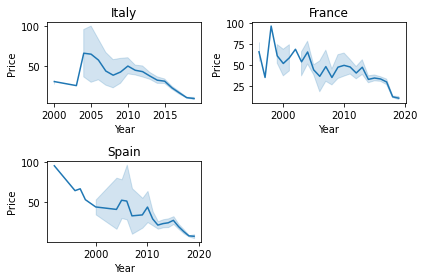

In [22]:
# Подготовим subplots
fig = plt.figure()
ax_italy = fig.add_subplot(2, 2, 1, title="Italy")
ax_france = fig.add_subplot(2, 2, 2, title="France")
ax_spain = fig.add_subplot(2, 2, 3, title="Spain")

sns.lineplot(ax=ax_italy, x="Year", y="Price", data=wines[wines['Country'] == 'Italy'])
sns.lineplot(ax=ax_france, x="Year", y="Price", data=wines[wines['Country'] == 'France'])
sns.lineplot(ax=ax_spain, x="Year", y="Price", data=wines[wines['Country'] == 'Spain'])

# Подгоняем отступы чтобы всем графикам хватило места
fig.tight_layout() 

plt.show()

Многие графики, используя праметр hue позволяют нам разбить данные на категории и построить по каждой из них свой график на одних координатных осях. 
Ниже приведен простейший случай. Как видно, он не особо нагляден и мы поищем более удачный способ одновременного рассмотрения нескольких групп данных.

In [23]:
top_country_wines = wines.loc[wines['Country'].isin(top_countries.index)]

<AxesSubplot:xlabel='Year', ylabel='Price'>

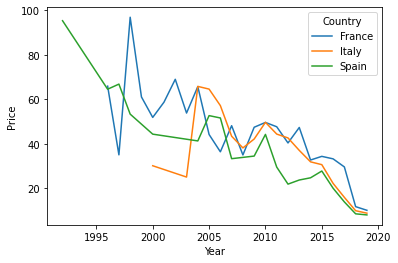

In [24]:
sns.lineplot(data=top_country_wines, x="Year", y="Price", hue='Country', errorbar=None)

Некотоые из наиболее продвинутых графиков в seaborn являются Figure-level графиками. Это значит, что их нельзя разместить как subplots внутри одной общей фигуры. Они и есть фигура из нескольких сабплотов.
Такие графики зачастую наиболее сложные и красивые.  

Сейчас мы попробуем посмотреть на наши данные с помощью одного из них - **Joint plot**.  
Но для начала подготовим уменьшенный набор данных. Оставим только те страны, по котором у нас больше всего инфорации. Эти страны мы узнали чуть выше.

С помощью __Joint plot__ можно увидеть как данные распределены по параметрам и на пересечении каких значений самое большое скопление строк. При разбиении на группы можно наглядно сравнить каждую группу с любой другой.

Здесь для своего удобства я использую особую палитру. Подробнее про палитры можно почитать здесь https://seaborn.pydata.org/generated/seaborn.color_palette.html

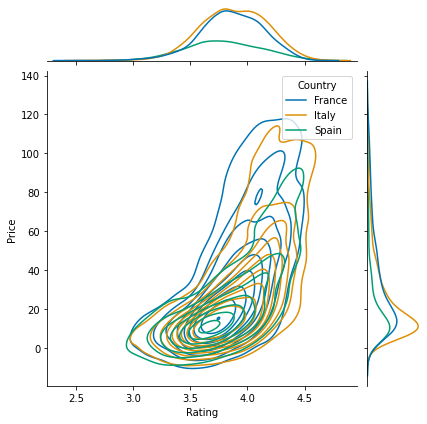

In [25]:
with sns.color_palette("colorblind"):
    sns.jointplot(
        data=top_country_wines,
        x="Rating", y="Price", hue="Country",
        kind="kde"
    )

Здесь к примеру мы видим, что больше всего вина продаётся приблизительно за $10 и с оценкой около 3.5. А самое дорогое вино можно встретить во Франции.  
Посмотрим ещё один пример:

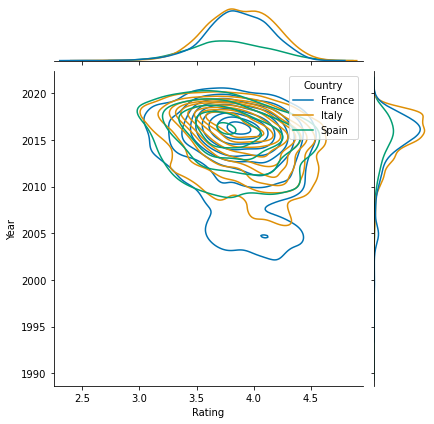

In [31]:
with sns.color_palette("colorblind"):
    sns.jointplot(
        data=top_country_wines,
        x="Rating", y="Year", hue="Country",
        kind="kde"
    )

Как вы думаете в какой стране больше старых вин? А в какой стране чаще встречаются вина с высоким рейтингом?

Попробуем предсказать рост цены в зависимости от роста рейтинга для вина из разных стран. Здесь нам поможет линейная регрессия.

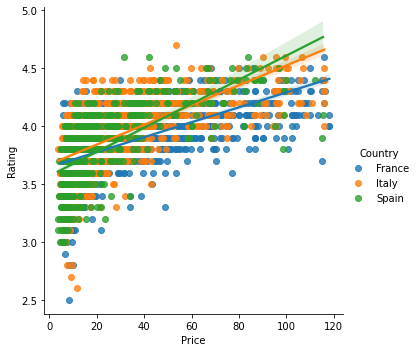

In [27]:
sns.lmplot(
    data=top_country_wines,
    x="Price", y="Rating", hue="Country"
)

Уже по этому графику мы можем сделать пару выводов:
- Во всех странах цена растёт при увеличении рейтинга
- Цена в испании растёт быстрее, чем в других странах при увеличении цены

Кроме этих выводов мы можем сделать предположение о том, какой может быть цена в каждой стране даже для вина с рейтингом, которого не было в наших данных.

Но на самом деле значение рейтинга не может расти бесконечно. Для более реалистичных предсказаний нам потребуется логарифмический тренд, который можно отобразить добавив всего один параметр.

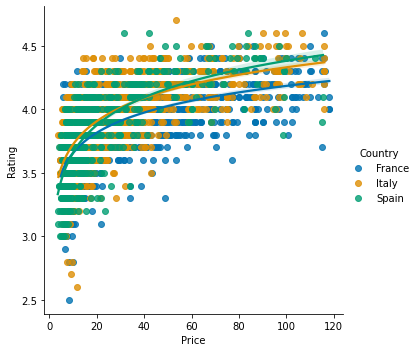

In [32]:
with sns.color_palette("colorblind"):
    sns.lmplot(
        data=top_country_wines,
        x="Price", y="Rating", hue="Country",
        logx=True
    )

## Практика и домашнее задание

Мы подготовили расширеный набор данных, в нём вина делятся по сортам. Они хранятся в файле **data/united_wines.csv**  
Сейчас попробуем вместе найти что-то интересное в данных, используя новый столбец и пример графика по ссылке:
https://seaborn.pydata.org/examples/paired_pointplots.html

(Подробности про PairGrid можно найти тут: https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

In [33]:
united_wines = pd.read_csv('/Users/daniilsobolev/Desktop/Аналитика/Статистика/Воркшоп/Matplotlib_Seaborn/data/united_wines.csv')

In [34]:
united_wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Category
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


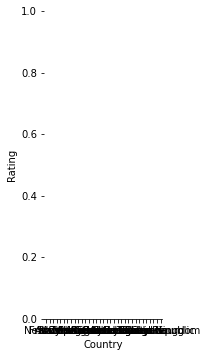

In [42]:
g = sns.PairGrid(united_wines, y_vars="Rating",
                 x_vars=["Country"],
                 height=5, aspect=.5)

g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

Дома попробуйте разобраться и с другими графиками из Seaborn. Красивые примеры можно найти здесь: https://seaborn.pydata.org/examples/index.html

P.S. Обратите внимание на вот этот пример:  
https://seaborn.pydata.org/examples/pair_grid_with_kde.html